In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.font_manager as fm
fname='./NanumBarunGothic.ttf'
font = fm.FontProperties(fname = fname).get_name()
plt.rcParams["font.family"] = font

In [2]:
data1 = pd.read_csv('hospital100.csv')
total_general_hospitals = data1

data6 = pd.read_csv('population0.csv')
population = data6

In [3]:
#컬럼 이름 변경
total_general_hospitals = total_general_hospitals.rename(columns = {'행정구역별.1':'시군구별', '행정구역별':'시도별'})
total_general_hospitals.head()

,시도별,시군구별,합계,종합병원 (개),병원 (개),의원 (개)
0,서울특별시,종로구,500,4,2,182
1,서울특별시,중구,543,3,3,220
2,서울특별시,용산구,298,1,2,123
3,서울특별시,성동구,432,1,7,197
4,서울특별시,광진구,543,2,3,261


In [4]:
#데이터 전처리("," "-" 제거)
total_general_hospitals['종합병원 (개)'] = total_general_hospitals['종합병원 (개)'].str.replace(',', '')
total_general_hospitals['종합병원 (개)'] = total_general_hospitals['종합병원 (개)'].str.replace('-', '0')
total_general_hospitals['종합병원 (개)'] = total_general_hospitals['종합병원 (개)'].astype(int)

total_general_hospitals['병원 (개)'] = total_general_hospitals['병원 (개)'].str.replace(',', '')
total_general_hospitals['병원 (개)'] = total_general_hospitals['병원 (개)'].str.replace('-', '0')
total_general_hospitals['병원 (개)'] = total_general_hospitals['병원 (개)'].astype(int)

total_general_hospitals['의원 (개)'] = total_general_hospitals['의원 (개)'].str.replace(',', '')
total_general_hospitals['의원 (개)'] = total_general_hospitals['의원 (개)'].str.replace('-', '0')
total_general_hospitals['의원 (개)'] = total_general_hospitals['의원 (개)'].astype(int)

total_general_hospitals['합계'] = total_general_hospitals['합계'].str.replace(',', '')
total_general_hospitals['합계'] = total_general_hospitals['합계'].str.replace('-', '0')
total_general_hospitals['합계'] = total_general_hospitals['합계'].astype(int)

In [5]:
population.head()

,시도별,시군구별,전체인구
0,서울특별시,종로구,"154,770"
1,서울특별시,중구,"125,709"
2,서울특별시,용산구,"229,161"
3,서울특별시,성동구,"304,808"
4,서울특별시,광진구,"357,703"


In [6]:
#구분: 50만 인구 이상은 대도시, 이하는 지방으로 표기
#구분2: 특별광역시만 대도시, 이하는 지방으로 표기
population["구분"] = "지방"
population["구분2"] = "지방"

population.head()

,시도별,시군구별,전체인구,구분,구분2
0,서울특별시,종로구,"154,770",지방,지방
1,서울특별시,중구,"125,709",지방,지방
2,서울특별시,용산구,"229,161",지방,지방
3,서울특별시,성동구,"304,808",지방,지방
4,서울특별시,광진구,"357,703",지방,지방


In [7]:
population.set_index('시도별', inplace= True)

In [8]:
# "," "-" 제거
population['전체인구'] = population['전체인구'].str.replace(',', '')
population['전체인구'] = population['전체인구'].str.replace('-', '')
population["전체인구"] = population['전체인구'].astype(int)

In [9]:
metrocity=["서울특별시","부산광역시","인천광역시","대구광역시","대전광역시",
         "광주광역시","울산광역시", "세종특별자치시"]

In [10]:
#metrocity에 해당하는 지역 대도시로 표기 (구분1, 구분2 동일)
for city in metrocity:
    population.loc[city, "구분"] = "대도시"
    population.loc[city, "구분2"] = "대도시"

In [11]:
population.head()

,시군구별,전체인구,구분,구분2
시도별,,,,
서울특별시,종로구,154770,대도시,대도시
서울특별시,중구,125709,대도시,대도시
서울특별시,용산구,229161,대도시,대도시
서울특별시,성동구,304808,대도시,대도시
서울특별시,광진구,357703,대도시,대도시


In [12]:
population.reset_index(inplace = True)

In [13]:
population.head()

,시도별,시군구별,전체인구,구분,구분2
0,서울특별시,종로구,154770,대도시,대도시
1,서울특별시,중구,125709,대도시,대도시
2,서울특별시,용산구,229161,대도시,대도시
3,서울특별시,성동구,304808,대도시,대도시
4,서울특별시,광진구,357703,대도시,대도시


In [15]:
cities = ["수원시", "창원시", "성남시", "고양시", 
         "용인시", "청주시", "안산시", "전주시", "안양시", "천안시", "포항시", 
         "화성시", "김해시", "부천시", "남양주시"]

#구분 컬럼에 50만 이상 도시를 대도시로 표기
for city in cities:
    population.loc[population[population["시군구별"]==city].index.values,"구분"] = "대도시"

final = population

In [16]:
final['종합병원 (개)'] = 0 
final['병원 (개)'] = 0 
final['의원 (개)'] = 0 
final['합계(타 병원타입 포함)'] = 0 

In [17]:
final.loc[population[population["시군구별"]=="청주시"].index.values]

,시도별,시군구별,전체인구,구분,구분2,종합병원 (개),병원 (개),의원 (개),합계(타 병원타입 포함)
124,충청북도,청주시,835590,대도시,지방,0,0,0,0


In [18]:
total_general_hospitals.loc[74,"시군구별"] = "세종특별자치시"

#인구수 테이블과 종합병원 테이블 데이터를 합치기 위해 각 테이블의 시도별 & 시군구가 매칭하면 '종합병원 (개)', '병원 (개)', '의원 (개)', '합계(타 병원타입 포함)'에 자료 삽입
for i in range(len(final)):
    for j in range(len(total_general_hospitals)):
        if (final.loc[i,"시도별"] == total_general_hospitals.loc[j,"시도별"]) and (final.loc[i,"시군구별"] == total_general_hospitals.loc[j,"시군구별"]):
            final.loc[i, "종합병원 (개)"] = total_general_hospitals.loc[j,"종합병원 (개)"]
            final.loc[i, "병원 (개)"] = total_general_hospitals.loc[j,"병원 (개)"]
            final.loc[i, "의원 (개)"] = total_general_hospitals.loc[j,"의원 (개)"]
            final.loc[i, "합계(타 병원타입 포함)"] = total_general_hospitals.loc[j,"합계"]

In [19]:
final.loc[final[final["시군구별"]=="청주시"].index.values]

,시도별,시군구별,전체인구,구분,구분2,종합병원 (개),병원 (개),의원 (개),합계(타 병원타입 포함)
124,충청북도,청주시,835590,대도시,지방,6,21,470,995


In [20]:
final.loc[final[final["시군구별"]=="세종특별자치시"].index.values]

,시도별,시군구별,전체인구,구분,구분2,종합병원 (개),병원 (개),의원 (개),합계(타 병원타입 포함)
74,세종특별자치시,세종특별자치시,280100,대도시,대도시,0,1,145,300


In [21]:
final_one = final.groupby(['시도별',"구분"], sort=False).sum()

In [22]:
final_one['종합병원 별 인구']= final_one['전체인구']/final_one['종합병원 (개)']
final_one['병원 별 인구']= final_one['전체인구']/final_one['병원 (개)']
final_one['의원 별 인구']= final_one['전체인구']/final_one['의원 (개)']
final_one['총 병원개수 기준 별 인구']= final_one['전체인구']/final_one['합계(타 병원타입 포함)']

In [23]:
#inf 제거
final_one = final_one.replace([np.inf, -np.inf], 0).dropna(axis=1)

In [24]:
#index 숫자로 변경
final_one.reset_index(level=0, inplace=True)
final_one.reset_index(level=0, inplace=True)

In [77]:
final_one

,구분,시도별,전체인구,종합병원 (개),병원 (개),의원 (개),합계(타 병원타입 포함),종합병원 별 인구,병원 별 인구,의원 별 인구,총 병원개수 기준 별 인구
0,대도시,서울특별시,9857426,57,214,8176,17142,172937.298246,46062.738318,1205.653865,575.045269
1,대도시,부산광역시,3470653,29,133,2283,5054,119677.689655,26095.135338,1520.215944,686.714088
2,대도시,대구광역시,2475231,12,112,1715,3664,206269.250000,22100.276786,1443.283382,675.554312
3,대도시,인천광역시,2948542,19,63,1489,3201,155186.421053,46802.253968,1980.216253,921.131521
4,대도시,광주광역시,1463770,21,75,899,2062,69703.333333,19516.933333,1628.220245,709.878758
5,대도시,대전광역시,1502227,10,39,1037,2178,150222.700000,38518.641026,1448.627772,689.727732
6,대도시,울산광역시,1165132,8,40,587,1346,145641.500000,29128.300000,1984.892675,865.625557
7,대도시,세종특별자치시,280100,0,1,145,300,0.000000,280100.000000,1931.724138,933.666667
8,대도시,경기도,7688412,36,162,4186,9121,213567.000000,47459.333333,1836.696608,842.935204
9,지방,경기도,5185483,25,90,2385,4985,207419.320000,57616.477778,2174.206709,1040.217252


In [91]:
locations = ["경기도","강원도","충청북도","충청남도","전라북도",
             "전라남도","경상북도","경상남도","제주특별자치도",
             "서울특별시","부산광역시","대구광역시","인천광역시",
             "광주광역시","대전광역시","울산광역시","세종특별자치시"]
result1 = []
result2 = []
result3 = []
result4 = []

#총 병원수 기준 병원당 인구
for city in locations:
    temp = final_one[final_one["시도별"]==city][["구분","총 병원개수 기준 별 인구"]].reset_index(drop=True)
    metro_temp=0
    suburb_temp=0
    for i in range(len(temp)):
        if temp.loc[i,"구분"] == "대도시":
            metro_temp = temp.loc[i,"총 병원개수 기준 별 인구"]
        if temp.loc[i,"구분"] == "지방":
            suburb_temp = temp.loc[i,"총 병원개수 기준 별 인구"]
    final_temp = {
        "name" : city,
        "metro" : round(metro_temp),
        "suburb" : round(suburb_temp)
    }
    result1.append(final_temp)

#종합병원 기준 병원당 인구
for city in locations:
    temp = final_one[final_one["시도별"]==city][["구분","종합병원 별 인구"]].reset_index(drop=True)
    metro_temp=0
    suburb_temp=0
    for i in range(len(temp)):
        if temp.loc[i,"구분"] == "대도시":
            metro_temp = temp.loc[i,"종합병원 별 인구"]
        if temp.loc[i,"구분"] == "지방":
            suburb_temp = temp.loc[i,"종합병원 별 인구"]
    final_temp = {
        "name" : city,
        "metro" : round(metro_temp),
        "suburb" : round(suburb_temp)
    }
    result2.append(final_temp)

#병원 기준 병원당 인구
for city in locations:
    temp = final_one[final_one["시도별"]==city][["구분","병원 별 인구"]].reset_index(drop=True)
    metro_temp=0
    suburb_temp=0
    for i in range(len(temp)):
        if temp.loc[i,"구분"] == "대도시":
            metro_temp = temp.loc[i,"병원 별 인구"]
        if temp.loc[i,"구분"] == "지방":
            suburb_temp = temp.loc[i,"병원 별 인구"]
    final_temp = {
        "name" : city,
        "metro" : round(metro_temp),
        "suburb" : round(suburb_temp)
    }
    result3.append(final_temp)

#의원 기준 병원당 인구
for city in locations:
    temp = final_one[final_one["시도별"]==city][["구분","의원 별 인구"]].reset_index(drop=True)
    metro_temp=0
    suburb_temp=0
    for i in range(len(temp)):
        if temp.loc[i,"구분"] == "대도시":
            metro_temp = temp.loc[i,"의원 별 인구"]
        if temp.loc[i,"구분"] == "지방":
            suburb_temp = temp.loc[i,"의원 별 인구"]
    final_temp = {
        "name" : city,
        "metro" : round(metro_temp),
        "suburb" : round(suburb_temp)
    }
    result4.append(final_temp)


#종합병원 (개), 병원 (개), 의원 (개), 합계(타 병원타입 포함) 컬럼 이름
column_list = final_one.columns[3:7]

metro_pop = final_one[final_one["구분"]=="대도시"]["전체인구"].sum()
suburb_pop = final_one[final_one["구분"]=="지방"]["전체인구"].sum()
total_pop = final_one["전체인구"].sum()

avg_dict = []

#종합병원 (개), 병원 (개), 의원 (개), 합계(타 병원타입 포함) 순서대로 전국 대도시 평균, 전국 지방 평균, 전국 평균 딕셔너리
for item in column_list:
    metro_hospital = final_one[final_one["구분"]=="대도시"][item].sum()
    suburb_hospital = final_one[final_one["구분"]=="지방"][item].sum()
    total_hospital = final_one[item].sum()

    metro_avg = metro_pop / metro_hospital
    suburb_avg = suburb_pop / suburb_hospital
    total_avg = total_pop / total_hospital

    temp = {'metro_avg': metro_avg, 'suburb_avg': suburb_avg, 'total_avg': total_avg}
    avg_dict.append(temp)

    
#총병원수 기준 병원당 인구 딕셔너리에 대도시 평균, 전국 지방 평균, 전국 평균 항목 추가
for item in result1: 
    item['metro_avg'] = round(avg_dict[3]['metro_avg'])
    item['suburb_avg'] = round(avg_dict[3]['suburb_avg'])
    item['total_avg'] = round(avg_dict[3]['total_avg'])

    
#종합병원 기준 병원당 인구 딕셔너리에 대도시 평균, 전국 지방 평균, 전국 평균 항목 추가
for item in result2: 
    item['metro_avg'] = round(avg_dict[0]['metro_avg'])
    item['suburb_avg'] = round(avg_dict[0]['suburb_avg'])
    item['total_avg'] = round(avg_dict[0]['total_avg'])


#병원 기준 병원당 인구 딕셔너리에 대도시 평균, 전국 지방 평균, 전국 평균 항목 추가
for item in result3:
    item['metro_avg'] = round(avg_dict[1]['metro_avg'])
    item['suburb_avg'] = round(avg_dict[1]['suburb_avg'])
    item['total_avg'] = round(avg_dict[1]['total_avg'])

    
#의원 기준 병원당 인구 딕셔너리에 대도시 평균, 전국 지방 평균, 전국 평균 항목 추가
for item in result4:
    item['metro_avg'] = round(avg_dict[2]['metro_avg'])
    item['suburb_avg'] = round(avg_dict[2]['suburb_avg'])
    item['total_avg'] = round(avg_dict[2]['total_avg'])


#json 파일로 export
import json
with open('total_hospital.json', 'w') as dst:
    jsonified = json.dumps(result1)
    dst.write(jsonified)
    
with open('general_hospital.json', 'w') as dst:
    jsonified = json.dumps(result2)
    dst.write(jsonified)
    
with open('medium_hospital.json', 'w') as dst:
    jsonified = json.dumps(result3)
    dst.write(jsonified)

with open('small_hospital.json', 'w') as dst:
    jsonified = json.dumps(result4)
    dst.write(jsonified)

# with open('general_hospital_avg.json', 'w') as dst:
#     jsonified = json.dumps(avg_dict[0])
#     dst.write(jsonified)

# with open('medium_hospital_avg.json', 'w') as dst:
#     jsonified = json.dumps(avg_dict[1])
#     dst.write(jsonified)

# with open('small_hospital_avg.json', 'w') as dst:
#     jsonified = json.dumps(avg_dict[2])
#     dst.write(jsonified)

# with open('total_hospital_avg.json', 'w') as dst:
#     jsonified = json.dumps(avg_dict[2])
#     dst.write(jsonified)

[{'name': '경기도',
  'metro': 843,
  'suburb': 1040,
  'metro_avg': 713,
  'suburb_avg': 974,
  'total_avg': 781},
 {'name': '강원도',
  'metro': 0,
  'suburb': 976,
  'metro_avg': 713,
  'suburb_avg': 974,
  'total_avg': 781},
 {'name': '충청북도',
  'metro': 840,
  'suburb': 989,
  'metro_avg': 713,
  'suburb_avg': 974,
  'total_avg': 781},
 {'name': '충청남도',
  'metro': 876,
  'suburb': 921,
  'metro_avg': 713,
  'suburb_avg': 974,
  'total_avg': 781},
 {'name': '전라북도',
  'metro': 647,
  'suburb': 857,
  'metro_avg': 713,
  'suburb_avg': 974,
  'total_avg': 781},
 {'name': '전라남도',
  'metro': 0,
  'suburb': 954,
  'metro_avg': 713,
  'suburb_avg': 974,
  'total_avg': 781},
 {'name': '경상북도',
  'metro': 852,
  'suburb': 1003,
  'metro_avg': 713,
  'suburb_avg': 974,
  'total_avg': 781},
 {'name': '경상남도',
  'metro': 899,
  'suburb': 987,
  'metro_avg': 713,
  'suburb_avg': 974,
  'total_avg': 781},
 {'name': '제주특별자치도',
  'metro': 0,
  'suburb': 795,
  'metro_avg': 713,
  'suburb_avg': 974,
  'tota

In [27]:
#총 병원개수 기준 병원당 인구 테이블을 정규분포화하고, 이를 지역별로 점수화 (음영처리에 필요)
import scipy as sp

final_one_normal = final_one[["구분","시도별","총 병원개수 기준 별 인구"]].reset_index(drop=True)
final_one_normal['정규분포화'] = sp.stats.zscore(final_one_normal['총 병원개수 기준 별 인구'])
final_one_normal['밀도'] = sp.stats.norm.cdf(final_one_normal['정규분포화'])
final_one_normal['점수'] = 100 - (final_one_normal['밀도']*100).astype(int)

final_one_normal = final_one_normal.sort_values('점수')
final_one_normal = final_one_normal.reset_index(drop=True)
final_one_normal_midpoint = final_one_normal.loc[11, "점수"]

final_one_normal['hover'] = 0

for i in range(len(final_one_normal)):
    final_one_normal.loc[i, "hover"] = round((final_one_normal.loc[i, "점수"]-final_one_normal_midpoint)/final_one_normal_midpoint*100)
    
final_one_normal

,구분,시도별,총 병원개수 기준 별 인구,정규분포화,밀도,점수,hover
0,지방,경기도,1040.217252,1.509004,0.934351,7,-84
1,지방,경상북도,1003.166283,1.215911,0.887991,12,-73
2,지방,경상남도,986.909091,1.087308,0.861550,14,-69
3,지방,충청북도,989.363755,1.106726,0.865794,14,-69
4,지방,강원도,976.159950,1.002276,0.841895,16,-64
5,지방,전라남도,954.415702,0.830268,0.796806,21,-53
6,대도시,세종특별자치시,933.666667,0.666132,0.747337,26,-42
7,대도시,인천광역시,921.131521,0.566972,0.714633,29,-36
8,지방,충청남도,920.792932,0.564294,0.713723,29,-36
9,대도시,경상남도,899.357102,0.394725,0.653477,35,-22


In [94]:
# 위 테이블은 50만 이상 시를 기준으로 대도시, 지방으로 나눠 정규분포화 했지만, 
# 메인 페이지에 필요한건 특별광역시/도 기준으로 대도시, 지방으로 나누기에 테이블 재정비 필요

main = final_one[["구분","시도별","전체인구","종합병원 (개)","병원 (개)", "의원 (개)", "합계(타 병원타입 포함)"]].groupby("시도별").sum()
main['시도별'] = main.index
main = main[['시도별',"전체인구","종합병원 (개)","병원 (개)", "의원 (개)", "합계(타 병원타입 포함)"]]
main = main.reset_index(drop=True)
main['총 병원수 기준 병원당 인구'] = main['전체인구'] / main['합계(타 병원타입 포함)']
main['정규분포화'] = sp.stats.zscore(main['총 병원수 기준 병원당 인구'])
main['밀도'] = sp.stats.norm.cdf(main['정규분포화'])
main['점수'] = 100 - (main['밀도']*100).astype(int)

main = main.sort_values('점수')
main = main.reset_index(drop=True)
main_midpoint = 50

main['hover'] = 0

for i in range(len(main)):
    main.loc[i, "hover"] = round((main.loc[i, "점수"] - main_midpoint)/ main_midpoint*100)
    
locations = ["경기도","강원도","충청북도","충청남도","전라북도",
             "전라남도","경상북도","경상남도","제주특별자치도",
             "서울특별시","부산광역시","대구광역시","인천광역시",
             "광주광역시","대전광역시","울산광역시","세종특별자치시"]
result = []

for location in locations:
    temp= {
     "name": location,
     "score": int(main[main["시도별"]==location]["점수"].values),
     "hover": int(main[main["시도별"]==location]["hover"].values)     
    }
    result.append(temp)

main[["시도별","전체인구","총 병원수 기준 병원당 인구", "정규분포화", "점수", "hover"]]
import json
with open('main_page_hospital.json', 'w') as dst:
    jsonified = json.dumps(result)
    dst.write(jsonified)

with open('main_page_hospital.json') as file:
    json_string = file.read()    
    main_page_hospital = json.loads(json_string)
    print(main_page_hospital)

[{'name': '경기도', 'score': 27, 'hover': -46}, {'name': '강원도', 'score': 13, 'hover': -74}, {'name': '충청북도', 'score': 29, 'hover': -42}, {'name': '충청남도', 'score': 28, 'hover': -44}, {'name': '전라북도', 'score': 71, 'hover': 42}, {'name': '전라남도', 'score': 17, 'hover': -66}, {'name': '경상북도', 'score': 14, 'hover': -72}, {'name': '경상남도', 'score': 19, 'hover': -62}, {'name': '제주특별자치도', 'score': 63, 'hover': 26}, {'name': '서울특별시', 'score': 99, 'hover': 98}, {'name': '부산광역시', 'score': 89, 'hover': 78}, {'name': '대구광역시', 'score': 91, 'hover': 82}, {'name': '인천광역시', 'score': 25, 'hover': -50}, {'name': '광주광역시', 'score': 85, 'hover': 70}, {'name': '대전광역시', 'score': 89, 'hover': 78}, {'name': '울산광역시', 'score': 41, 'hover': -18}, {'name': '세종특별자치시', 'score': 22, 'hover': -56}]


In [29]:
x=["대도시", "지방"]
y1_point = [final_one[final_one["구분"]=="대도시"]["전체인구"].sum()/final_one[final_one["구분"]=="대도시"]["종합병원 (개)"].sum(),
    final_one[final_one["구분"]=="지방"]["전체인구"].sum()/final_one[final_one["구분"]=="지방"]["종합병원 (개)"].sum(),
    ]

y2_point = [final_one[final_one["구분"]=="대도시"]["전체인구"].sum()/final_one[final_one["구분"]=="대도시"]["병원 (개)"].sum(),
    final_one[final_one["구분"]=="지방"]["전체인구"].sum()/final_one[final_one["구분"]=="지방"]["병원 (개)"].sum(),
    ]

y3_point = [final_one[final_one["구분"]=="대도시"]["전체인구"].sum()/final_one[final_one["구분"]=="대도시"]["의원 (개)"].sum(),
    final_one[final_one["구분"]=="지방"]["전체인구"].sum()/final_one[final_one["구분"]=="지방"]["의원 (개)"].sum(),
    ]

y4_point = [final_one[final_one["구분"]=="대도시"]["전체인구"].sum()/final_one[final_one["구분"]=="대도시"]["합계(타 병원타입 포함)"].sum(),
    final_one[final_one["구분"]=="지방"]["전체인구"].sum()/final_one[final_one["구분"]=="지방"]["합계(타 병원타입 포함)"].sum(),
    ]

## 대도시 기준을 한국법 상 50만 이상 인구로 지정시

Text(0.5, 1.0, '합계(타 병원타입 포함) 기준 병원 / 인구')

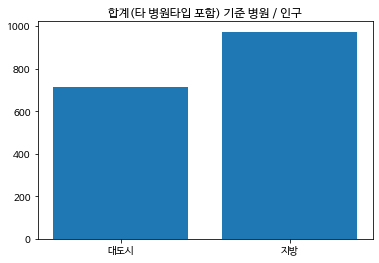

In [30]:
plt.bar(x,y4_point)
plt.title("합계(타 병원타입 포함) 기준 병원 / 인구")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '서울특별시'),
  Text(1, 0, '부산광역시'),
  Text(2, 0, '대구광역시'),
  Text(3, 0, '인천광역시'),
  Text(4, 0, '광주광역시'),
  Text(5, 0, '대전광역시'),
  Text(6, 0, '울산광역시'),
  Text(7, 0, '세종특별자치시'),
  Text(8, 0, '경기도'),
  Text(9, 0, '강원도'),
  Text(10, 0, '충청북도'),
  Text(11, 0, '충청남도'),
  Text(12, 0, '전라북도'),
  Text(13, 0, '전라남도'),
  Text(14, 0, '경상북도'),
  Text(15, 0, '경상남도'),
  Text(16, 0, '제주특별자치도')])

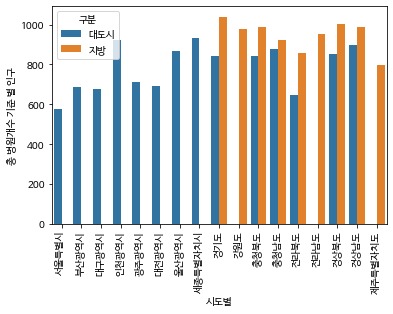

In [31]:
sns.barplot(
    data = final_one,
    x = '시도별',
    y = '총 병원개수 기준 별 인구',
    hue = '구분',
)
plt.xticks(rotation=90)

Text(0.5, 1.0, '종합병원 / 인구')

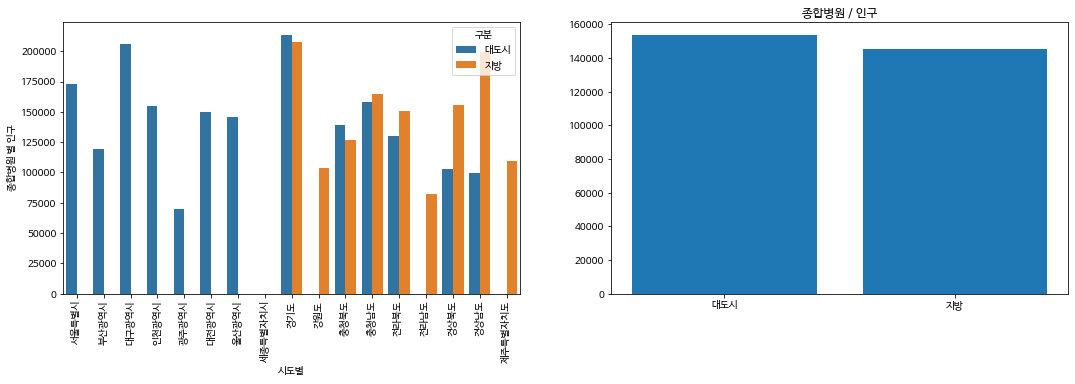

In [32]:
plt.figure(figsize=(18,5))
plt.subplot(121)
sns.barplot(
    data = final_one,
    x = '시도별',
    y = '종합병원 별 인구',
    hue = '구분',
)
plt.xticks(rotation=90)


plt.subplot(122)
plt.bar(x,y1_point)
plt.title("종합병원 / 인구")

분석: 도마다 차이가 있으나, 일반적으로는 대도시의 종합병원 당 인구 커버 수가 지방보다 낮음. 다만, 도 를 차이두지 않고 분석한다면 대도시의 종합병원 당 인구커버 수가 높음. 이는 특별광역시의 종합병원 당 인구 커버 수가 도 보다 높다고 생각 가능

Text(0.5, 1.0, '병원 / 인구')

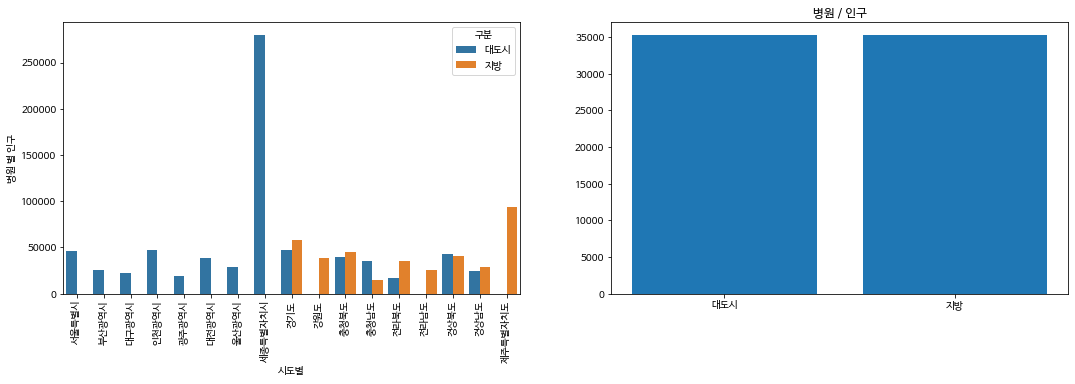

In [33]:
plt.figure(figsize=(18,5))
plt.subplot(121)
sns.barplot(
    data = final_one,
    x = '시도별',
    y = '병원 별 인구',
    hue = '구분'
)
plt.xticks(rotation=90)

plt.subplot(122)
plt.bar(x,y2_point)
plt.title("병원 / 인구")

비슷함

Text(0.5, 1.0, '의원 / 인구')

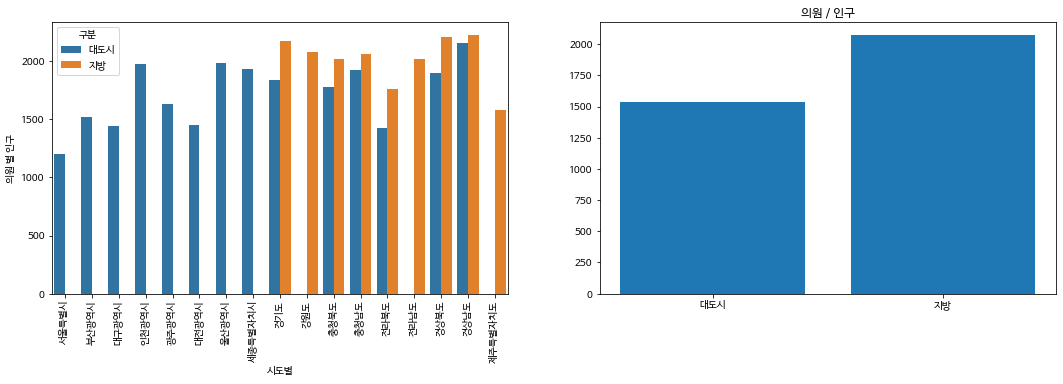

In [34]:
plt.figure(figsize=(18,5))
plt.subplot(121)
sns.barplot(
    data = final_one,
    x = '시도별',
    y = '의원 별 인구',
    hue = '구분'
)
plt.xticks(rotation=90)

plt.subplot(122)
plt.bar(x,y3_point)
plt.title("의원 / 인구")

결론: 
- 도 내 대도시/지방 비교시, 대도시 사람들이 더 붐비지 않는 종합병원 혜텍을 받음.
- 특별광역시 와 도 내 대도시 비교시, 도내 대도시 사람들이 더 붐비지 않는 종합병원 혜택을 받음.
- 의원 그 어느 비교에서나 대도시에 사는 사람이 더 붐비지 않는 종합병원 혜택을 받음

In [35]:
final_two = final.groupby(['시도별',"구분2"], sort=False).sum()

In [36]:
final_two['종합병원 별 인구']= final_two['전체인구']/final_two['종합병원 (개)']
final_two['병원 별 인구']= final_two['전체인구']/final_two['병원 (개)']
final_two['의원 별 인구']= final_two['전체인구']/final_two['의원 (개)']
final_two['총 병원개수 기준 별 인구']= final_two['전체인구']/final_two['합계(타 병원타입 포함)']

In [37]:
final_two = final_two.replace([np.inf, -np.inf], 0).dropna(axis=1)

In [44]:
final_two.reset_index(level=0, inplace=True)
final_two.reset_index(level=0, inplace=True)

In [39]:
final_two

,구분2,시도별,전체인구,종합병원 (개),병원 (개),의원 (개),합계(타 병원타입 포함),종합병원 별 인구,병원 별 인구,의원 별 인구,총 병원개수 기준 별 인구
0,대도시,서울특별시,9857426,57,214,8176,17142,172937.298246,46062.738318,1205.653865,575.045269
1,대도시,부산광역시,3470653,29,133,2283,5054,119677.689655,26095.135338,1520.215944,686.714088
2,대도시,대구광역시,2475231,12,112,1715,3664,206269.250000,22100.276786,1443.283382,675.554312
3,대도시,인천광역시,2948542,19,63,1489,3201,155186.421053,46802.253968,1980.216253,921.131521
4,대도시,광주광역시,1463770,21,75,899,2062,69703.333333,19516.933333,1628.220245,709.878758
5,대도시,대전광역시,1502227,10,39,1037,2178,150222.700000,38518.641026,1448.627772,689.727732
6,대도시,울산광역시,1165132,8,40,587,1346,145641.500000,29128.300000,1984.892675,865.625557
7,대도시,세종특별자치시,280100,0,1,145,300,0.000000,280100.000000,1931.724138,933.666667
8,지방,경기도,12873895,61,252,6571,14106,211047.459016,51086.884921,1959.198752,912.653835
9,지방,강원도,1550142,15,40,746,1588,103342.800000,38753.550000,2077.938338,976.159950


In [40]:
x=["대도시", "지방"]
y1_points = [final_two[final_two["구분2"]=="대도시"]["전체인구"].sum()/final_two[final_two["구분2"]=="대도시"]["종합병원 (개)"].sum(),
    final_two[final_two["구분2"]=="지방"]["전체인구"].sum()/final_two[final_two["구분2"]=="지방"]["종합병원 (개)"].sum(),
    ]

y2_points = [final_two[final_two["구분2"]=="대도시"]["전체인구"].sum()/final_two[final_two["구분2"]=="대도시"]["병원 (개)"].sum(),
    final_two[final_two["구분2"]=="지방"]["전체인구"].sum()/final_two[final_two["구분2"]=="지방"]["병원 (개)"].sum(),
    ]

y3_points = [final_two[final_two["구분2"]=="대도시"]["전체인구"].sum()/final_two[final_two["구분2"]=="대도시"]["의원 (개)"].sum(),
    final_two[final_two["구분2"]=="지방"]["전체인구"].sum()/final_two[final_two["구분2"]=="지방"]["의원 (개)"].sum(),
    ]

y4_points = [final_two[final_two["구분2"]=="대도시"]["전체인구"].sum()/final_two[final_two["구분2"]=="대도시"]["합계(타 병원타입 포함)"].sum(),
    final_two[final_two["구분2"]=="지방"]["전체인구"].sum()/final_two[final_two["구분2"]=="지방"]["합계(타 병원타입 포함)"].sum(),
    ]

## 대도시 기준을 특별/광역시로 한정 시

Text(0.5, 1.0, '합계(타 병원타입 포함) 기준 병원 / 인구')

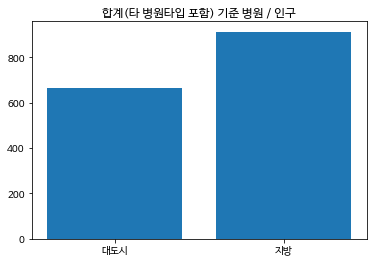

In [41]:
plt.bar(x,y4_points)
plt.title("합계(타 병원타입 포함) 기준 병원 / 인구")

Text(0.5, 1.0, '종합병원 / 인구')

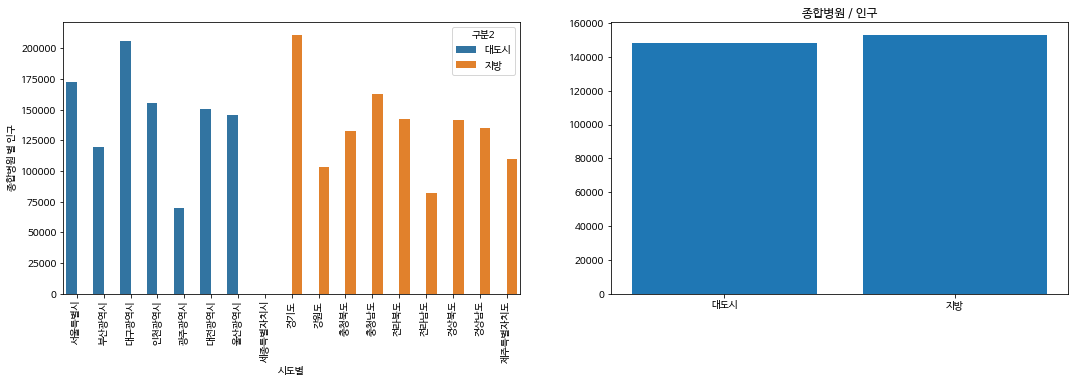

In [42]:
plt.figure(figsize=(18,5))
plt.subplot(121)
sns.barplot(
    data = final_two,
    x = '시도별',
    y = '종합병원 별 인구',
    hue = '구분2',
)
plt.xticks(rotation=90)

plt.subplot(122)
plt.bar(x,y1_points)
plt.title("종합병원 / 인구")


Text(0.5, 1.0, '병원 / 인구')

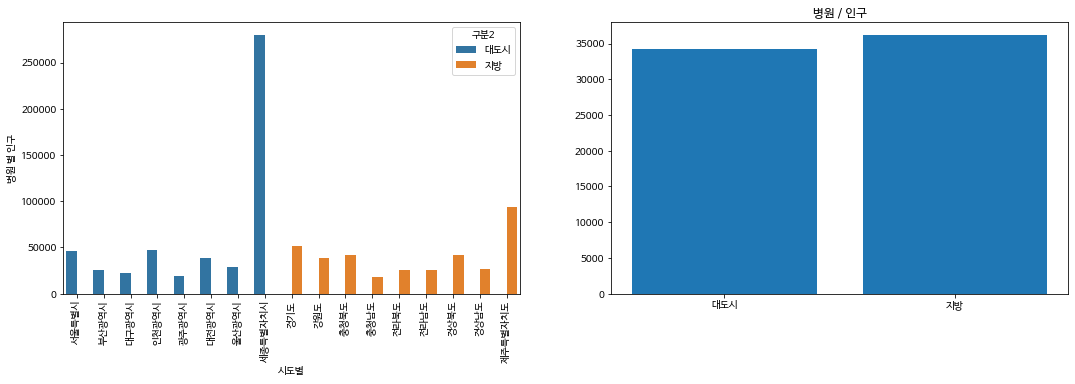

In [43]:
plt.figure(figsize=(18,5))
plt.subplot(121)
sns.barplot(
    data = final_two,
    x = '시도별',
    y = '병원 별 인구',
    hue = '구분2',
)
plt.xticks(rotation=90)

plt.subplot(122)
plt.bar(x,y2_points)
plt.title("병원 / 인구")


Text(0.5, 1.0, '의원 / 인구')

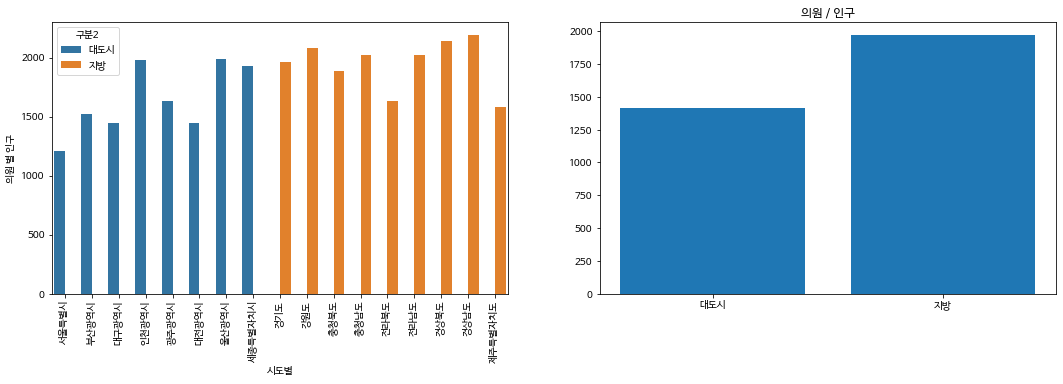

In [44]:
plt.figure(figsize=(18,5))
plt.subplot(121)
sns.barplot(
    data = final_two,
    x = '시도별',
    y = '의원 별 인구',
    hue = '구분2',
)
plt.xticks(rotation=90)

plt.subplot(122)
plt.bar(x,y3_points)
plt.title("의원 / 인구")

결론: 그 어느 비교에서나 특별광역시 사람들이 도 사람보다 더 많은 혜택을 받음